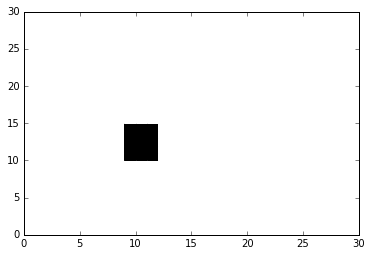

('time_step: ', 0)


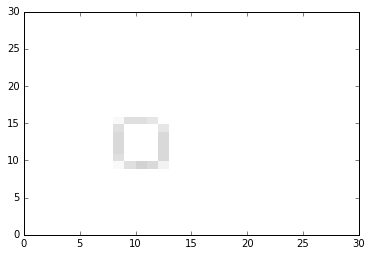

('time_step: ', 1)


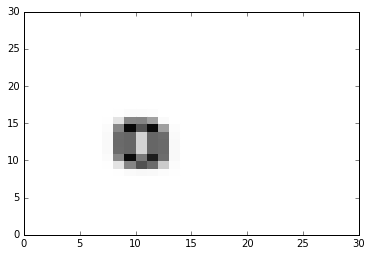

('time_step: ', 2)


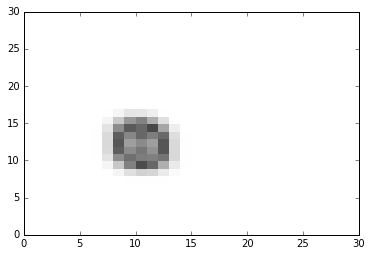

('time_step: ', 3)


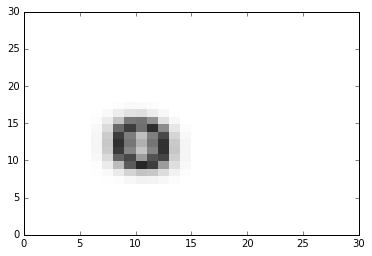

('time_step: ', 4)


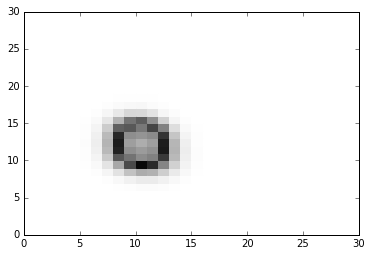

('time_step: ', 5)


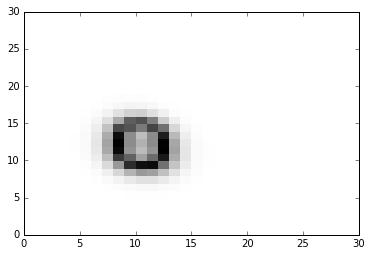

('time_step: ', 6)


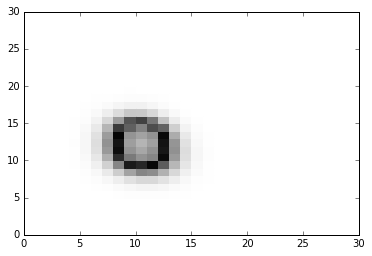

('time_step: ', 7)


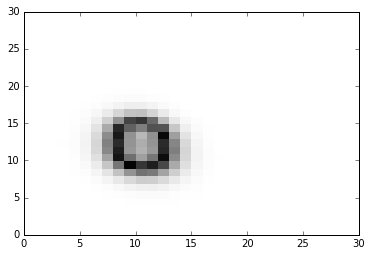

('time_step: ', 8)


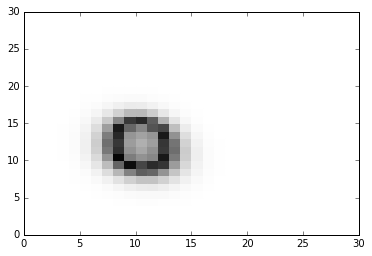

('time_step: ', 9)


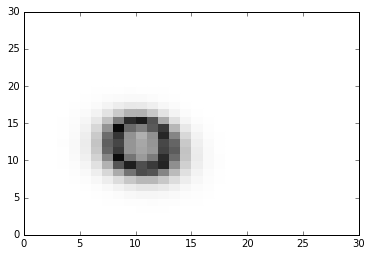

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import math

dA = 1
dB = 0.5
feed = 0.055
kill = 0.062

def setup(r):
    grid = []
    next_grid = []
    for x in range(r):
        x_grid = []
        x_next = []
        for y in range(r):
            x_grid.append({"a":1, "b":0})
            x_next.append({"a":1, "b":0})
        grid.append(x_grid)
        next_grid.append(x_next)

    seed(grid, 10, 15)

    return grid, next_grid

def seed(grid, start, stop):
    for i in range(stop-start):
        value = start + i
        grid[start][value]["b"] = 1
        grid[start-1][value]["b"] = 1
        grid[start+1][value]["b"] = 1

def draw(current_grid, next_grid, r):
    for x in range(1, r-1):
        for y in range(1, r-1):
            #print y
            a = current_grid[x][y]["a"]
            b = current_grid[x][y]["b"]
            a_value = a + (dA * laplaceA(current_grid, x, y)) - (a * b * b) + (feed * (1-a))
            b_value = b + (dB * laplaceB(current_grid, x, y)) + (a * b * b) - ((kill + feed) * b)
            a_value = clamp(a_value, 0, 1)
            b_value = clamp(b_value, 0, 1)
            next_grid[x][y]["a"] = a_value
            next_grid[x][y]["b"] = b_value
    
    return next_grid

def swap(grid, next_grid):
    temp = grid
    grid = next_grid
    next_grid = temp
    
    return grid, next_grid
    
def laplaceA(current_grid, x, y):
    sumA = 0
    sumA += current_grid[x][y]['a'] * (-1)
    
    sumA += current_grid[x+1][y]['a'] * 0.2
    sumA += current_grid[x-1][y]['a'] * 0.2  
    sumA += current_grid[x][y+1]['a'] * 0.2
    sumA += current_grid[x][y-1]['a'] * 0.2
    
    sumA += current_grid[x+1][y+1]['a'] * 0.05
    sumA += current_grid[x+1][y-1]['a'] * 0.05
    sumA += current_grid[x-1][y+1]['a'] * 0.05
    sumA += current_grid[x-1][y+1]['a'] * 0.05
    
    return sumA

def laplaceB(current_grid,x,y):
    sumB = 0
    sumB += current_grid[x][y]['b'] * (-1)
    
    sumB += current_grid[x+1][y]['b'] * 0.2
    sumB += current_grid[x-1][y]['b'] * 0.2  
    sumB += current_grid[x][y+1]['b'] * 0.2
    sumB += current_grid[x][y-1]['b'] * 0.2
    
    sumB += current_grid[x+1][y+1]['b'] * 0.05
    sumB += current_grid[x+1][y-1]['b'] * 0.05
    sumB += current_grid[x-1][y+1]['b'] * 0.05
    sumB += current_grid[x-1][y+1]['b'] * 0.05
    
    return sumB

def clamp(n, minn, maxn):
    if n < minn:
        return minn
    elif n > maxn:
        return maxn
    else:
        return n
                
test_grid, test_next = setup(50)
next_one = draw(test_grid, test_next, 50)

def plot(next_grid, r):
    
    ax = plt.gca()
    
    for x in range(1, r-1):
        for y in range(1, r-1):
            a = next_grid[x][y]["a"]
            b = next_grid[x][y]["b"]
            gray_scale = a-b if a-b >= 0 else (-1)*(a-b)
            ax.add_patch(Rectangle((x, y), 1, 1, fill=True, color=str(gray_scale), alpha=1))
    plt.ylim(0,r)
    plt.xlim(0,r)
    plt.show()


def try_to_plot(time_steps, r):
    
    grid, next_grid = setup(r)
    
    plot(grid, r) #t=0
    
    for i in range(time_steps):
        
        print("time_step: ", i)
        
        next_grid = draw(grid, next_grid, r)
        plot(next_grid, r)
        
        grid, next_grid= swap(grid, next_grid)
        
        #seed(next_grid, i, 20)
        
        #plot(next_grid, 30)
        
    #plt.show()

try_to_plot(10, 30)
#fig = plt.figure()
#ax = fig.gca()

#ani = animation.FuncAnimation(fig, try_to_plot(1,30), frames=100, interval=1, blit=True)



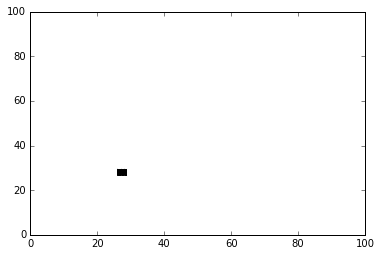

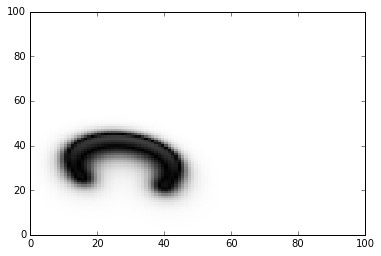

In [13]:
def setup(r):
    grid = []
    next_grid = []
    for x in range(r):
        x_grid = []
        x_next = []
        for y in range(r):
            x_grid.append({"a":1, "b":0})
            x_next.append({"a":1, "b":0})
        grid.append(x_grid)
        next_grid.append(x_next)

    seed(grid, 27, 30)

    return grid, next_grid

def draw(current_grid, next_grid, r):
    for x in range(1, r-1):
        for y in range(1, r-1):
            #print y
            a = current_grid[x][y]["a"]
            b = current_grid[x][y]["b"]
            a_value = a + (dA * laplaceA(current_grid, x, y)) - (a * b * b) + (feed * (1-a))
            b_value = b + (dB * laplaceB(current_grid, x, y)) + (a * b *b) - ((kill + feed) * b)
            a_value = clamp(a_value, 0, 1)
            b_value = clamp(b_value, 0, 1)
            next_grid[x][y]["a"] = a_value
            next_grid[x][y]["b"] = b_value
    
    return next_grid

init_grid, test_grid = setup(100)
plot(init_grid, 100)
for i in range(500):
    test_grid = draw(init_grid, test_grid, 100)
    init_grid, test_grid= swap(init_grid, test_grid)


plot(test_grid, 100)

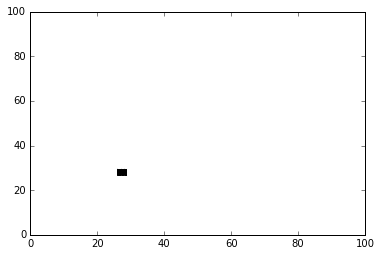

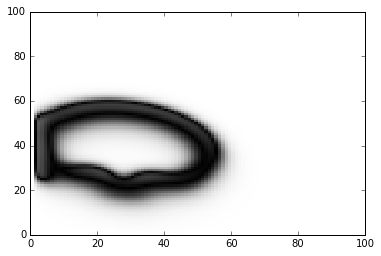

In [14]:
init_grid, test_grid = setup(100)
plot(init_grid, 100)
for i in range(1000):
    test_grid = draw(init_grid, test_grid, 100)
    init_grid, test_grid= swap(init_grid, test_grid)


plot(test_grid, 100)

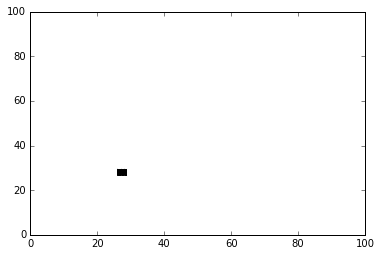

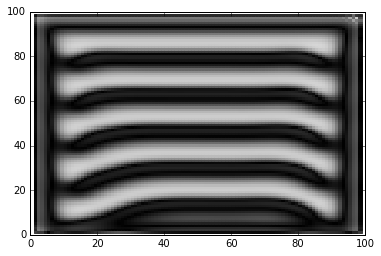

In [15]:
init_grid, test_grid = setup(100)
plot(init_grid, 100)
for i in range(10000):
    test_grid = draw(init_grid, test_grid, 100)
    init_grid, test_grid= swap(init_grid, test_grid)


plot(test_grid, 100)

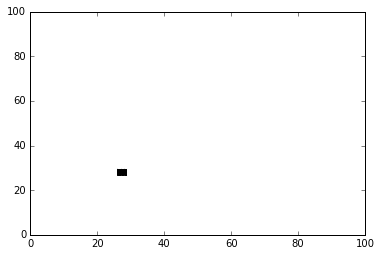

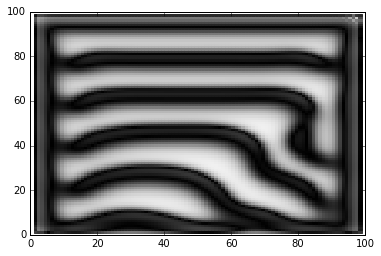

In [16]:
init_grid, test_grid = setup(100)
plot(init_grid, 100)
for i in range(5000):
    test_grid = draw(init_grid, test_grid, 100)
    init_grid, test_grid= swap(init_grid, test_grid)


plot(test_grid, 100)

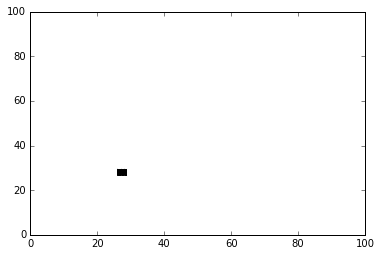

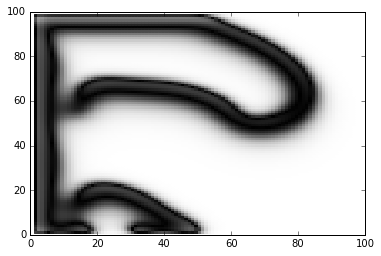

In [17]:
init_grid, test_grid = setup(100)
plot(init_grid, 100)
for i in range(2500):
    test_grid = draw(init_grid, test_grid, 100)
    init_grid, test_grid= swap(init_grid, test_grid)


plot(test_grid, 100)

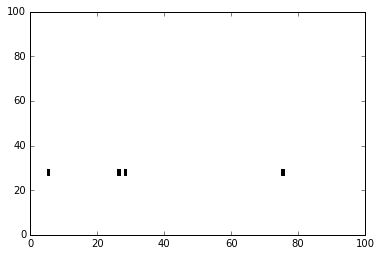

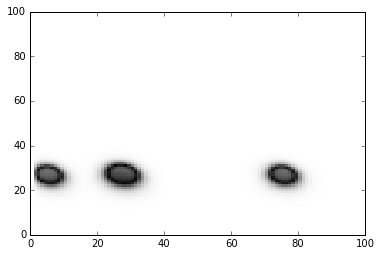

In [18]:
def seed(grid, start, stop):
    for i in range(stop-start):
        value = start + i
        grid[5][value]["b"] = 1
        grid[75][value]["b"] = 1
        grid[start-1][value]["b"] = 1
        grid[start+1][value]["b"] = 1

def setup(r):
    grid = []
    next_grid = []
    for x in range(r):
        x_grid = []
        x_next = []
        for y in range(r):
            x_grid.append({"a":1, "b":0})
            x_next.append({"a":1, "b":0})
        grid.append(x_grid)
        next_grid.append(x_next)

    seed(grid, 27, 30)

    return grid, next_grid

def draw(current_grid, next_grid, r):
    for x in range(1, r-1):
        for y in range(1, r-1):
            #print y
            a = current_grid[x][y]["a"]
            b = current_grid[x][y]["b"]
            a_value = a + (dA * laplaceA(current_grid, x, y)) - (a * b * b) + (feed * (1-a))
            b_value = b + (dB * laplaceB(current_grid, x, y)) + (a * b *b) - ((kill + feed) * b)
            a_value = clamp(a_value, 0, 1)
            b_value = clamp(b_value, 0, 1)
            next_grid[x][y]["a"] = a_value
            next_grid[x][y]["b"] = b_value
    
    return next_grid

init_grid, test_grid = setup(100)
plot(init_grid, 100)
for i in range(50):
    test_grid = draw(init_grid, test_grid, 100)
    init_grid, test_grid= swap(init_grid, test_grid)


plot(test_grid, 100)